#Projeto Regressão Linear

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
url = "https://raw.githubusercontent.com/CharlesPrado23/Bootcamp2oSemestre2021/main/Semana7/FuelConsumption.csv"
df = pd.read_csv(url)

In [ ]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [ ]:
df.groupby('MODEL').size()

MODEL
1500 (MDS)         2
1500 4X4 (MDS)     2
1500 4X4 DIESEL    1
1500 4X4 FFV       2
1500 DIESEL        1
                  ..
Z4 sDRIVE35is      1
iQ                 1
tC                 2
xB                 2
xD                 2
Length: 663, dtype: int64

In [ ]:
df.groupby('VEHICLECLASS').size()

VEHICLECLASS
COMPACT                     172
FULL-SIZE                    86
MID-SIZE                    178
MINICOMPACT                  47
MINIVAN                      14
PICKUP TRUCK - SMALL         12
PICKUP TRUCK - STANDARD      62
SPECIAL PURPOSE VEHICLE       7
STATION WAGON - MID-SIZE      6
STATION WAGON - SMALL        36
SUBCOMPACT                   65
SUV - SMALL                 154
SUV - STANDARD              110
TWO-SEATER                   71
VAN - CARGO                  22
VAN - PASSENGER              25
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


#####Porque mantemos o 'df'? Questão de boas práticas, referenciando sempre o DataFrame

In [ ]:
df_fuel = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS' ]]
df_fuel.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


In [ ]:
df_fuel.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [ ]:
df_fuel.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f0b428590>,
      dtype=object)

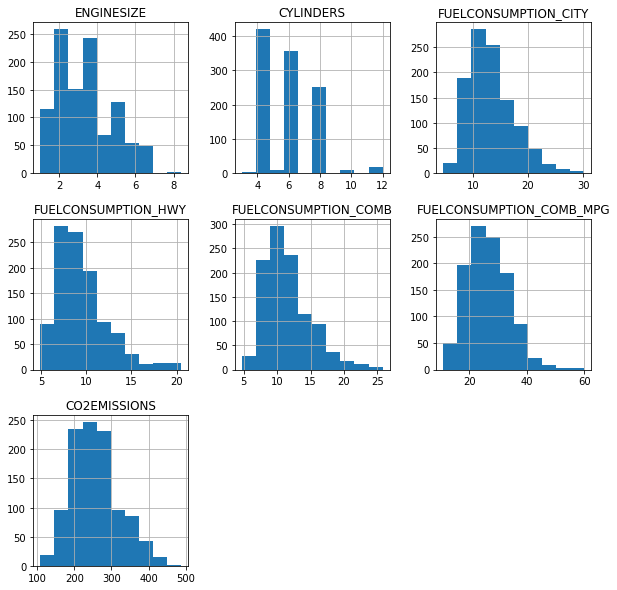

In [ ]:
df_fuel.hist(figsize= (10,10))
#ver variáveis em formato de histograma, definindo o tamanho do parametro de visualização

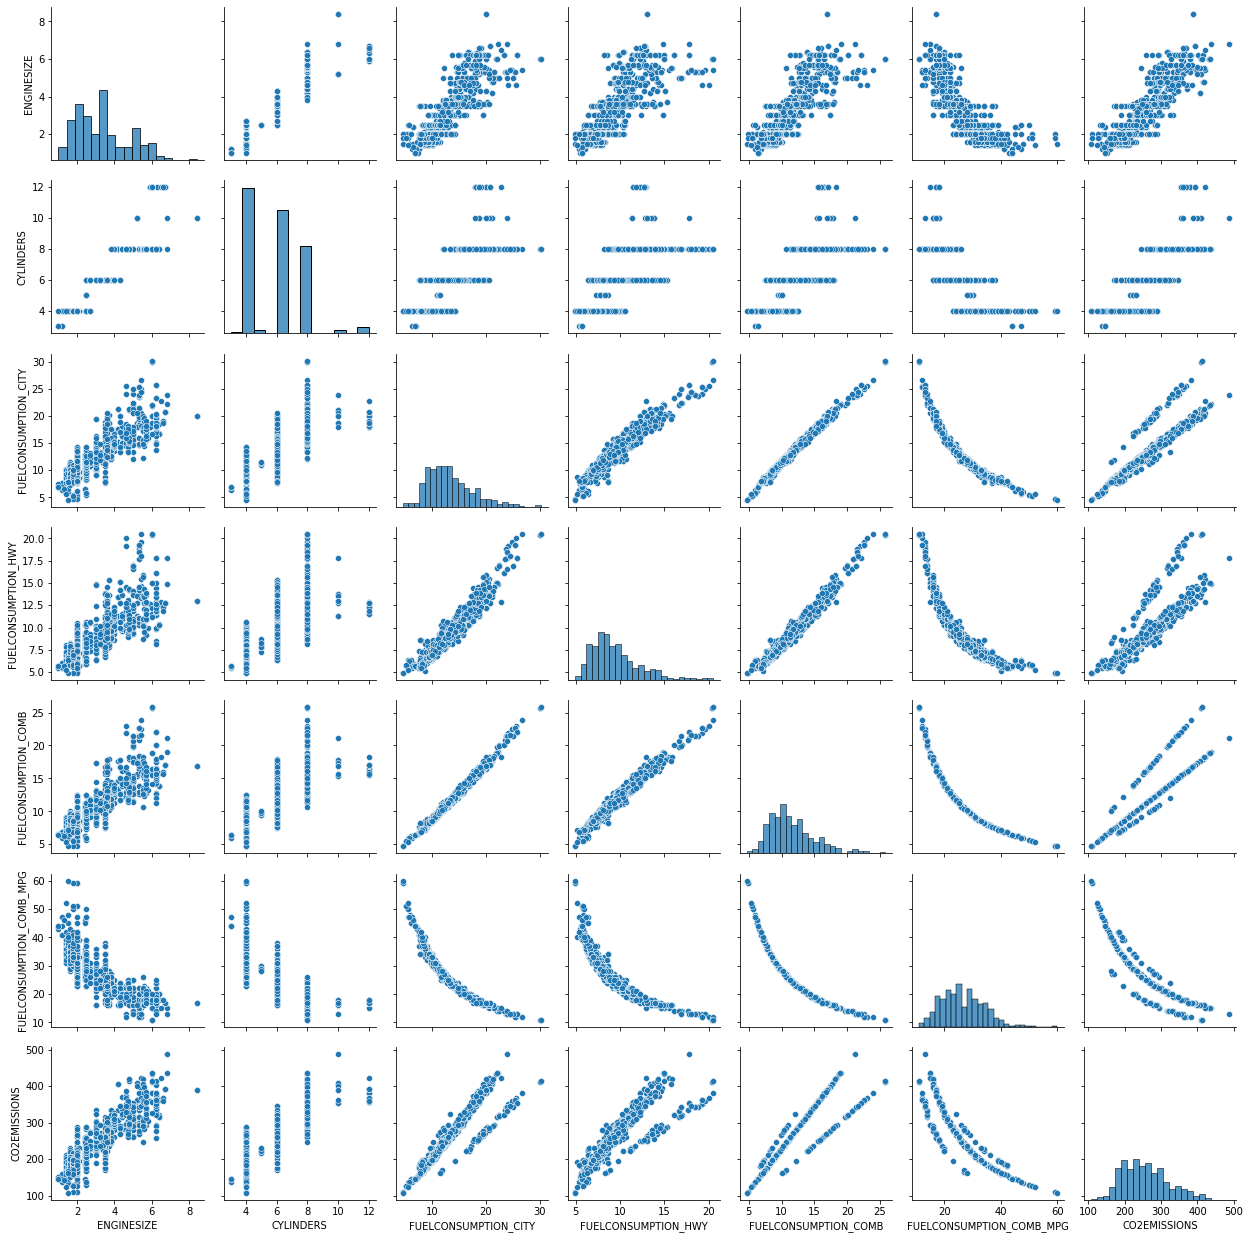

In [ ]:
sns.pairplot(df_fuel) #na diagonal temos o histograma, e os demais são as respectivas relações em scatter plot (gráfico de dispersão)

In [ ]:
X = df_fuel[['FUELCONSUMPTION_COMB']]
y = df_fuel[['CO2EMISSIONS']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
#normalmente usamos uma proporção de 70/30 na divisão entre treino e teste; o valor em random_state fixa a semente de escolha, de forma a sempre escolher os mesmos

In [ ]:
X_train

,FUELCONSUMPTION_COMB
765,14.2
94,9.6
375,12.3
994,11.3
903,11.3
...,...
490,7.6
256,7.9
1032,7.2
733,13.4


In [ ]:
lr_single = LinearRegression()
lr_single.fit(X_train, y_train)
lr_single.score(X_train, y_train)

0.7805472053895396

In [ ]:
lr_single.score(X_test,y_test)

0.825023488052464

In [ ]:
x_curve = np.arange(0,30) #no 'np.arange' eu posso passar valores fracionados, no 'arange' não; mas ambos delimitam o início e o final da reta
y_curve = lr_single.predict(x_curve.reshape(-1, 1))

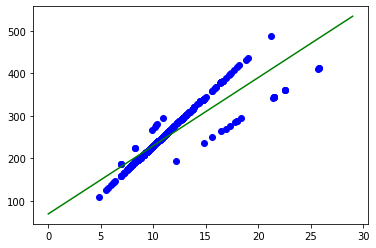

In [ ]:
#
plt.plot(X_test,y_test,'bo', x_curve,y_curve, 'g-')

In [ ]:
from sklearn.metrics import r2_score
y_pred = lr_single.predict(X_test)
print('The R-square (test) is: ', r2_score(y_test, y_pred))

The R-square (test) is:  0.825023488052464


###Regressão Múltipla

In [ ]:
X = df_fuel[['FUELCONSUMPTION_COMB', 'ENGINESIZE']]
y = df_fuel[['CO2EMISSIONS']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [ ]:
lr_multiple = LinearRegression()
lr_multiple.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
### Avaliar o Modelo - Verificar o qualidade do treinamento x desempenho no conjunto de Teste
lr_multiple.score(X_train, y_train)

0.8485885495173857

In [ ]:
### Avaliacao do modelo é feita analisando o resultado sobre o conjunto de Teste 
lr_multiple.score(X_test, y_test)

0.8748332858197087

## Pipeline - sequência de tarefas 

In [ ]:
#poly= PolynomialFeatures(degree=2)
#poly.fit(X_train)
#X_poly = poly.transform(X_train)
#lr = LinearRegression()
#lt.fit(X_poly,y)

In [ ]:
model = Pipeline([('poly', PolynomialFeatures(degree=1)),('linear', LinearRegression(fit_intercept=False))])

In [ ]:
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8748332858197087

In [ ]:
y_pred = model.predict(X_test)
#calculate r-squared
r2 = r2_score(y_test,y_pred)
N=y_test.shape[0]
p=2
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.8740460737808389


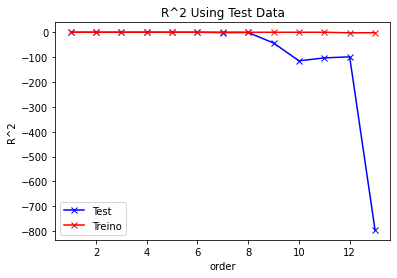

In [ ]:
Rsqu_test = []
Rsqu_model =[]

#from sklearn.linear_model import Ridge

order = [1, 2,3,4,5,6,7,8,9,10,11,12,13]
for n in order:
    #pr = PolynomialFeatures(degree=n)
    
    #x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    #x_test_pr = pr.fit_transform(x_test[['horsepower']])  
    modelPipeline = Pipeline([('poly', PolynomialFeatures(degree=n)),('linear', LinearRegression(fit_intercept=False))])
    
    modelPipeline.fit(X_train,y_train)
    y_pred = modelPipeline.predict(X_test)
    
    #Rsqu_test.append(r2_score(X_test,y_pred))
    Rsqu_test.append(modelPipeline.score(X_test,y_test))
    Rsqu_model.append(modelPipeline.score(X_train, y_train))

#x_new = np.linspace(15, 300, 100)
#y_new = model(x_new)    
plt.plot(order, Rsqu_test,'b-x')
plt.plot(order, Rsqu_model,'r-x')
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.legend(('Test', 'Treino'))

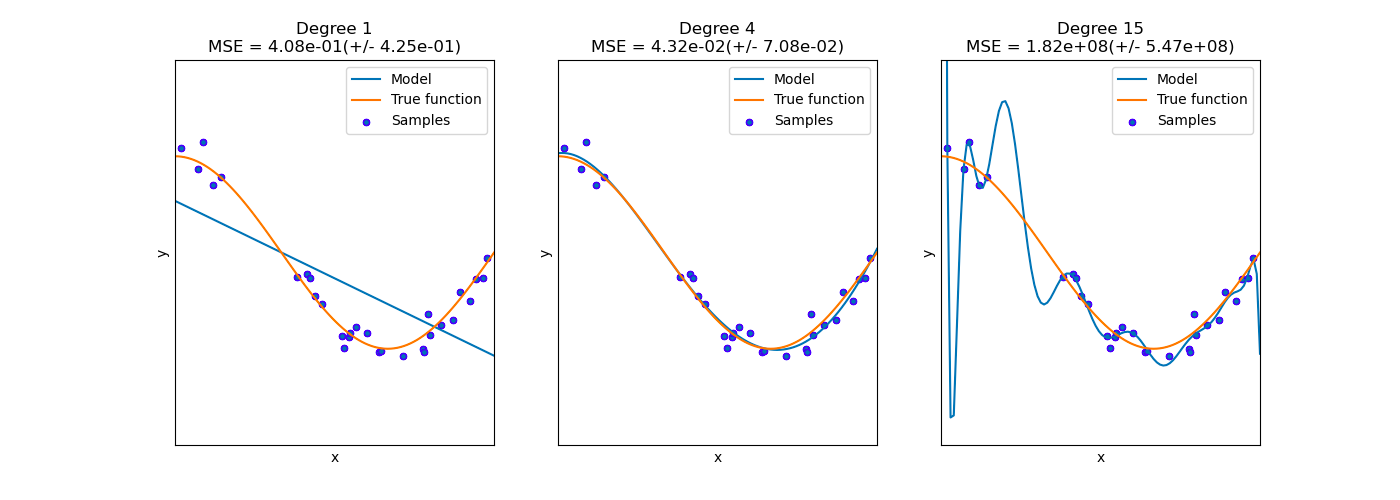

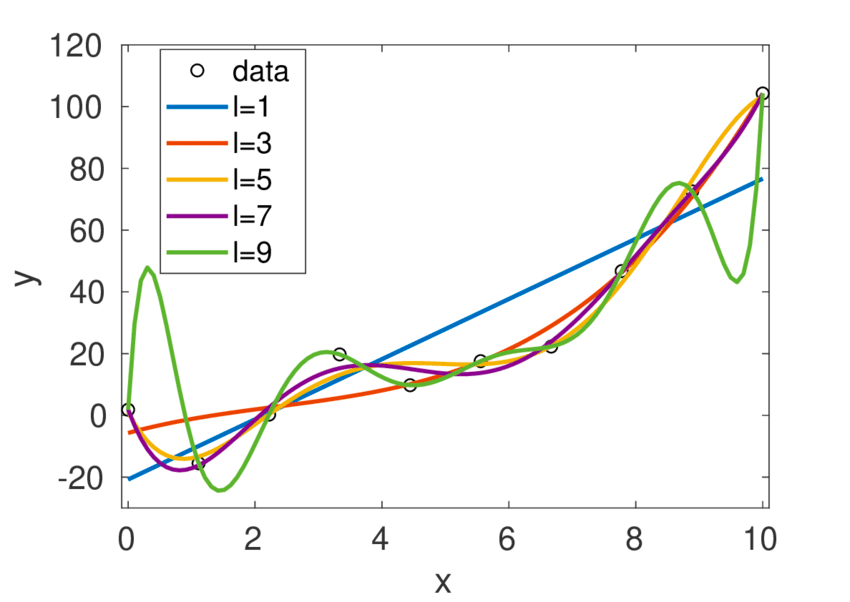

In [ ]:
x=np.arange(-10,11,0.1)

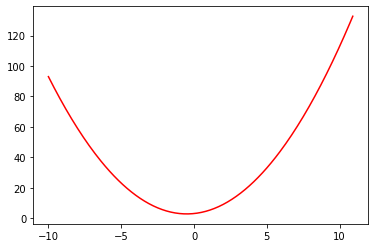

In [ ]:
y = 1*(x**2) + 1*x + 3
plt.plot(x,y,'r')

Text(0.5, 0, 'Independent Variable')

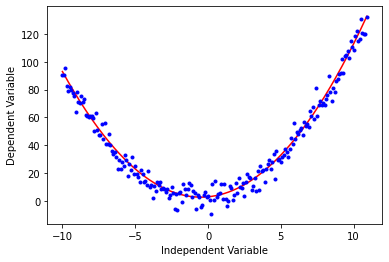

In [ ]:
y_noise = 5 * np.random.normal(size=x.size)
ydata = y + y_noise #estou somando os ruídos
plt.plot(x,y,'r')
plt.plot(x,ydata,'.b')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')

In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(x, y)
print("The Pearson Correlation Coefficient (x,y) without noise is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient (x,y) without noise is 0.33071080271226766  with a P-value of P = 9.462588289129882e-07


In [ ]:
pearson_coef, p_value = stats.pearsonr(x, ydata) #depois que eu somei o ruído, ainda assim não aumentou tanto
print("The Pearson Correlation Coefficient (x,ydata) with noise is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient (x,ydata) with noise is 0.334919426547204  with a P-value of P = 6.739513482797262e-07


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, ydata, test_size=0.30, random_state=0)

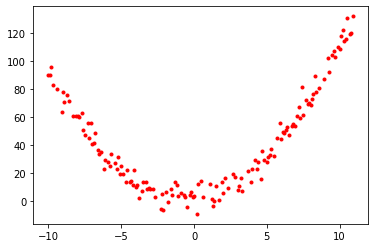

In [ ]:
plt.plot(X_train,y_train,'.r')

In [ ]:
def quadratic(x,a,b,c):
     y = a*(x**2) + b*x + c 
     return y

In [ ]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(quadratic, X_train, y_train)
#print the final parameters
print(" a = %f, b = %f, c = %f" % (popt[0], popt[1],popt[2]))

 a = 0.996113, b = 1.009787, c = 2.293476


In [ ]:
# predict using test set
y_hat = quadratic(X_test, *popt)

In [ ]:
print("Residual sum of squares (MSE): %f" % np.mean((y_hat - y_test) ** 2))
from sklearn.metrics import r2_score
print("R2-score: " , r2_score(y_test,y_hat) )

Residual sum of squares (MSE): 21.124967
R2-score:  0.9805274728392405


In [ ]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

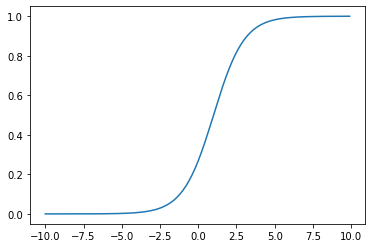

In [ ]:
x=np.arange(-10,10,0.1)
Y = sigmoid(x,1,1)
plt.plot(x,Y)

In [ ]:
!wget -nv -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv
    
df = pd.read_csv("china_gdp.csv")
df.head(10)

2021-09-03 11:18:44 URL:https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


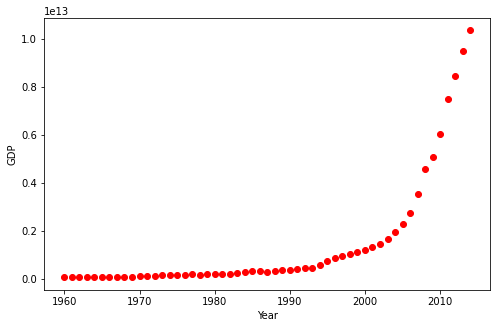

In [ ]:
plt.figure(figsize=(8,5))
X_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(X_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

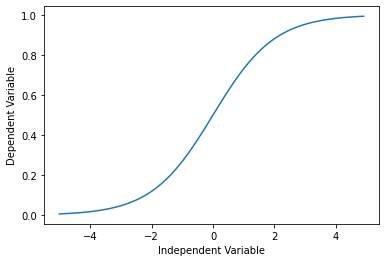

In [ ]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [ ]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

In [ ]:
X_data

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])

In [ ]:
Y = 1.0 / (1.0 + np.exp(-X_data))
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

In [ ]:
#from sklearn.preprocessing import StandardScaler
X_data = X_data/np.max(X_data)
y_data = y_data/np.max(y_data)

In [ ]:
X_data

array([0.97318769, 0.97368421, 0.97418073, 0.97467726, 0.97517378,
       0.97567031, 0.97616683, 0.97666336, 0.97715988, 0.97765641,
       0.97815293, 0.97864945, 0.97914598, 0.9796425 , 0.98013903,
       0.98063555, 0.98113208, 0.9816286 , 0.98212512, 0.98262165,
       0.98311817, 0.9836147 , 0.98411122, 0.98460775, 0.98510427,
       0.98560079, 0.98609732, 0.98659384, 0.98709037, 0.98758689,
       0.98808342, 0.98857994, 0.98907646, 0.98957299, 0.99006951,
       0.99056604, 0.99106256, 0.99155909, 0.99205561, 0.99255214,
       0.99304866, 0.99354518, 0.99404171, 0.99453823, 0.99503476,
       0.99553128, 0.99602781, 0.99652433, 0.99702085, 0.99751738,
       0.9980139 , 0.99851043, 0.99900695, 0.99950348, 1.        ])

In [ ]:
popt, pcov = curve_fit(sigmoid, X_data, y_data)
print("a = %f, b = %f" % (popt[0], popt[1]))

a = 1.000000, b = 1.000000


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [ ]:
y_hat = sigmoid(X_test, *popt)
y_hat

array([5.54485247e-05, 4.74258732e-02, 4.52622223e-04, 2.75356911e-05,
       9.99590433e-01, 6.29733561e-02, 6.45656306e-01, 7.68524783e-01,
       1.19202922e-01, 9.87871565e-01, 1.50118226e-03, 9.90048198e-01,
       3.01841632e-03, 9.99664650e-01, 1.97816111e-01, 8.31726965e-02,
       9.99775183e-01, 6.75082731e-04, 1.21284350e-02, 1.01029194e-04,
       9.97527377e-01, 7.48462275e-05, 3.36319640e-05, 4.07013772e-03,
       1.41851065e-01, 9.16827304e-01, 8.17574476e-01, 8.02183889e-01,
       9.91837429e-01, 9.99447221e-01, 2.93122308e-02, 9.80159694e-01,
       9.42675824e-01, 1.98403057e-02, 9.99547378e-01, 9.70687769e-01,
       9.98641480e-01, 6.89974481e-01, 8.27172229e-05, 9.24141820e-01,
       9.99696553e-01, 1.50710358e-04, 3.54343694e-01, 9.56892745e-01,
       2.49153889e-05, 2.65969936e-02, 9.30861580e-01, 1.35851995e-03,
       9.01329865e-03, 4.50166003e-01, 2.24816770e-04, 2.89050497e-01,
       9.96315760e-01, 9.99849290e-01, 3.71689371e-05, 9.11051194e-04,
      

In [ ]:
plt.plot(y_hat)